## Cerinta 1

Actual expected total time: 1.794279 
Actual expected steps completed: 2.578 


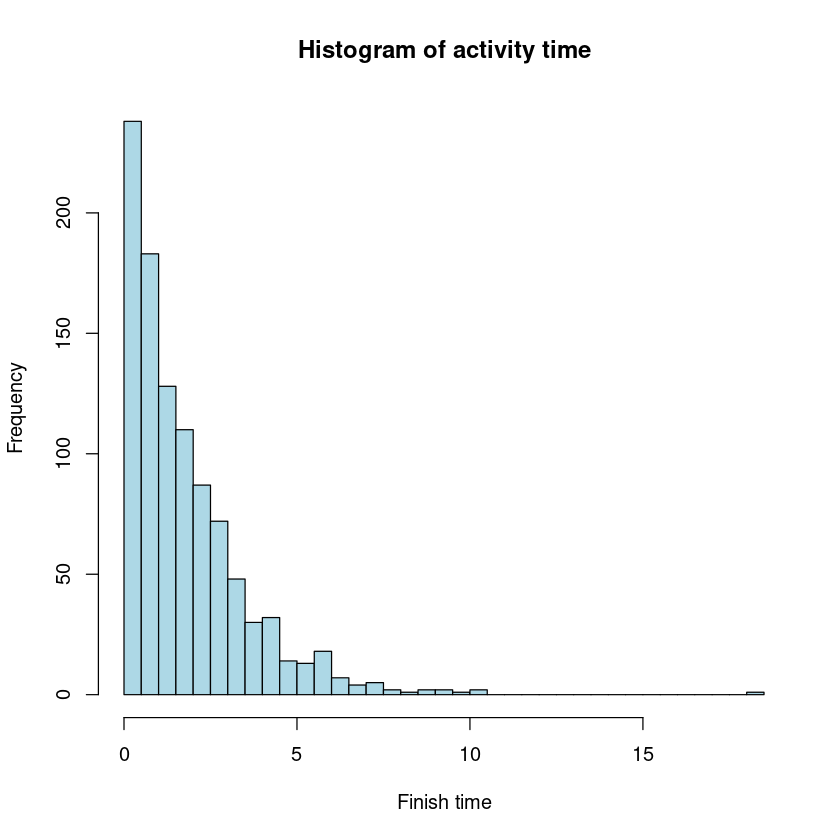

In [1]:
rm(list = ls())

set.seed(123)
n <- 5
simulations <- 1000

simulate_activity <- function(n) {
    lambda <- runif(n, min = 0.5, max = 3)
    alpha <- runif(n, min = 0.4, max = 0.9)
    
    total_time <- 0
    steps_completed <- 0
    prob_to_finish <- prod(alpha)
    
    for (i in 1:n) {
        time_i <- rexp(1, rate = lambda[i])
        total_time <- total_time + time_i
        steps_completed <- steps_completed + 1
        
        if (runif(1) > alpha[i]) {
            break
        }
    }
    
    return(list(total_time = total_time, steps_completed = steps_completed, probs_to_finish = prob_to_finish))
}

simulated_results <- replicate(simulations, simulate_activity(n), simplify = FALSE)

total_times <- sapply(simulated_results, function(x) x$total_time)
steps_completed <- sapply(simulated_results, function(x) x$steps_completed)
probs_to_finish <- sapply(simulated_results, function(x) x$probs_to_finish)

cat("Actual expected total time:", mean(total_times), "\n")
cat("Actual expected steps completed:", mean(steps_completed), "\n")

hist(total_times, breaks=50, col = "lightblue", main = "Histogram of activity time", xlab = "Finish time")

## T are repartie exponentiala

## Cerinta 2

In [2]:
expected_lambda <- (0.5 + 3) / 2
expected_time <- 1 / expected_lambda
expected_prob <- (0.4 + 0.9) / 2
total_expected_time <- n * expected_prob * expected_time

cat("Theoretically expected total time:", total_expected_time, "\n")

Theoretically expected total time: 1.857143 


## Cerinta 3

In [3]:
cat("Estimated probability to finish:", mean(probs_to_finish), "\n")

Estimated probability to finish: 0.1141124 


## Cerinta 4

In [4]:
sigma <- runif(1, 1, 2)
acceptable_times <- total_times[total_times <= sigma]
acceptable_finish_prob <- length(acceptable_times) / simulations

cat("The probability to finish in a time smaller than or equal to", sigma, "is:", acceptable_finish_prob, "\n")

The probability to finish in a time smaller than or equal to 1.234243 is: 0.483 


## Cerinta 5

Minimum time to finish the activity is 0.0004706033 and the maximum time is 18.31221

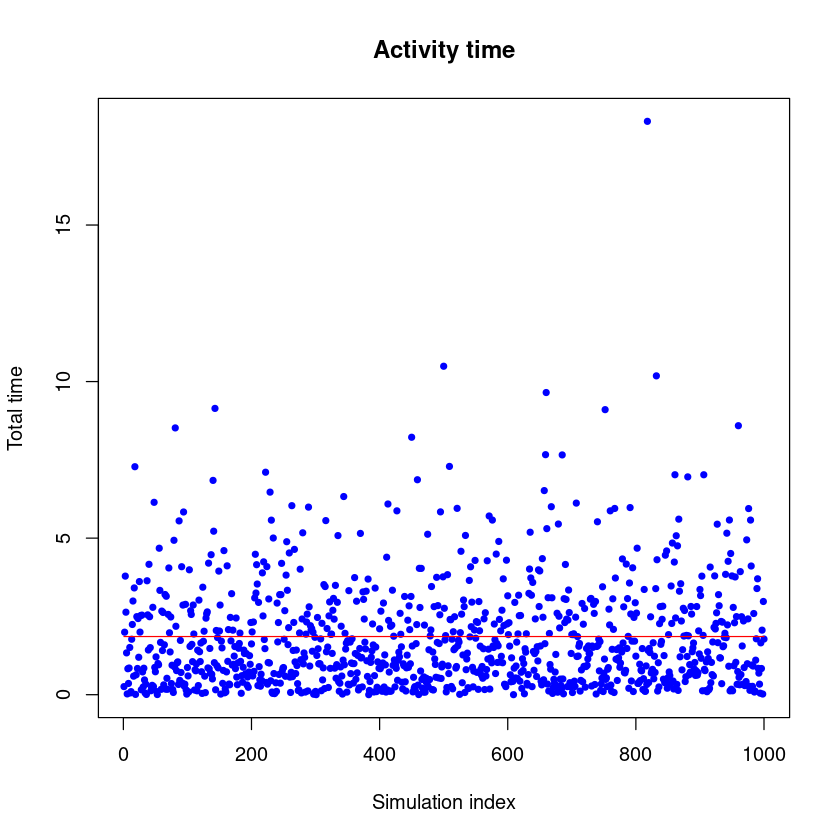

In [5]:
min_time <- min(total_times)
max_time <- max(total_times)
cat("Minimum time to finish the activity is", min_time, "and the maximum time is", max_time);

plot(total_times, main = "Activity time", xlab = "Simulation index", ylab = "Total time", col = "blue", pch=20)

lines(replicate(simulations, total_expected_time), col = "red", lty = 1)

## Cerinta 6

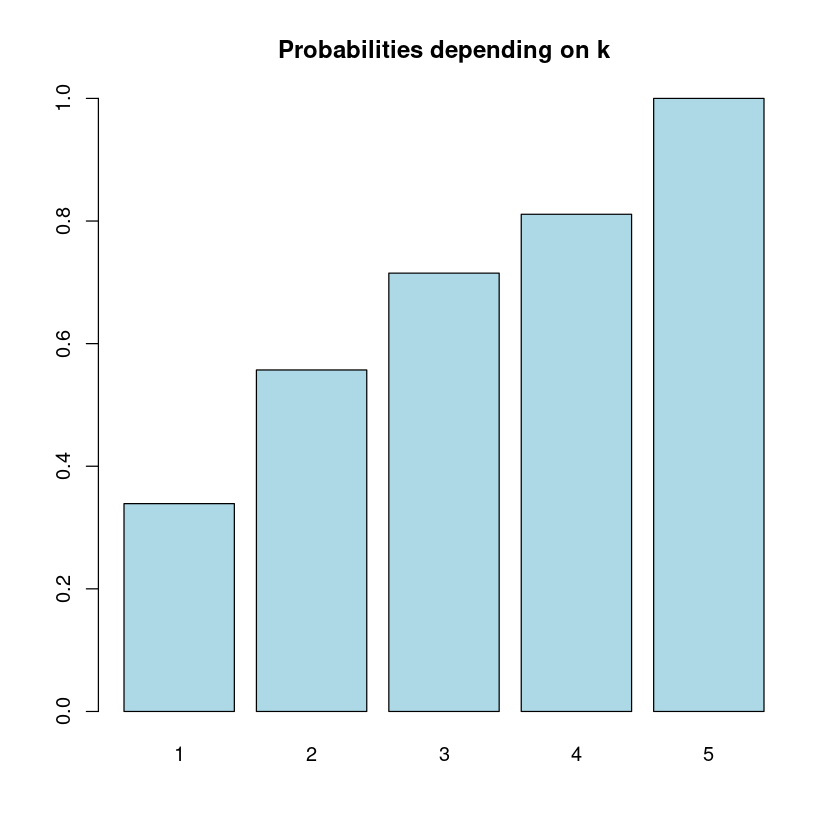

In [6]:
k <- seq(1, n)
prob_array <- sapply(k, function(x) {
    curr_len <- length(steps_completed[steps_completed <= x])
    curr_prob <- curr_len / simulations
    return (curr_prob)
})

barplot(prob_array, names.arg = k, main = "Probabilities depending on k", col="lightblue")